In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv


In [2]:
!pip install fasttext

In [3]:
df = pd.read_csv("/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv",names = ["category","description"],header = None)

In [4]:
df.head()

,category,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [5]:
df1=df

In [6]:
#SHAPE OF DATA
df.shape

(50425, 2)

In [7]:
#DESCRIPTION
df.describe()

,category,description
count,50425,50424
unique,4,27802
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19313,30


In [8]:
#INFORMATION OF DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     50425 non-null  object
 1   description  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [9]:
#UNIQUE ELEMENT
df.nunique()

category           4
description    27802
dtype: int64

In [10]:
#NULL COUNT
df.isnull().sum()

category       0
description    1
dtype: int64

In [11]:
#ABOVE WE FOUND THAT ONLY ONE NULL VALUE PRESENT IN DESCRIPTION COLUMN IF WE DROP THAT ROW THEN TOTAL NULL VALUE EQUAL TO ZERO
df = df.dropna(subset=["description"], axis=0)

In [12]:
#NULL COUNT
df.isnull().sum()

category       0
description    0
dtype: int64

In [13]:
df.shape

(50424, 2)

<Axes: >

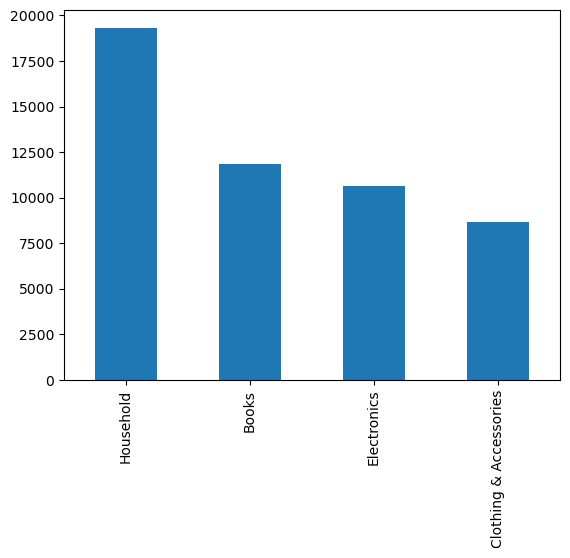

In [14]:
df['category'].value_counts().plot.bar()

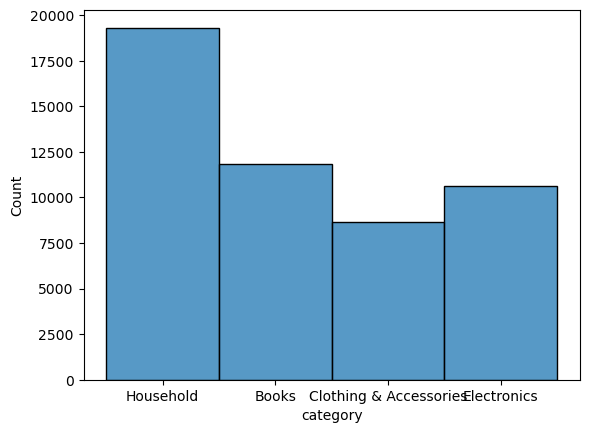

In [15]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
   
   
sns.histplot(x='category', data=df, )
plt.show()

In [16]:
# DATA REDUCTION
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.2 MB/s eta 0:00:00


In [17]:
import nltk
import string
import re
import contractions
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords,wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [18]:
## LETS DIVIDE THE DATABASE IN 4 DIFFERENT DATAFRAME BASED UPON THE CATEGORY FOR FURTHER REDUCING EVENLY
train0=df[df['category']=="Household"]
train1=df[df['category']=="Books"]
train2=df[df['category']=="Clothing & Accessories"]
train3=df[df['category']=="Electronics"]

In [19]:
# train0.shape,train1.shape,train2.shape,train3.shape

In [20]:
train0=train0[:int(train0.shape[0]/10)]
train1=train1[:int(train1.shape[0])]
train2=train2[:int(train2.shape[0])]
train3=train3[:int(train3.shape[0])]
train0.shape,train1.shape,train2.shape,train3.shape

((1931, 2), (11820, 2), (8670, 2), (10621, 2))

In [21]:
df=pd.concat([train0,train1,train2,train3],axis=0)

In [22]:
df.shape

(33042, 2)

In [23]:
##here we remove the all non essential text from the review text
#Remove Hashtags
df['description'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)
#Remove Mention
df['description'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)
#Remove URL
df['description'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)
#covert to lowercase
df['description']=df['description'].str.lower()

In [24]:
#remove punctuation
punc = string.punctuation
df['description'] = df['description'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
df.head()

,category,description
0,Household,paper plane design framed wall hanging motivat...
1,Household,saf floral framed painting wood 30 inch x 10 i...
2,Household,saf uv textured modern art print framed painti...
3,Household,saf flower print framed painting synthetic 135...
4,Household,incredible gifts india wooden happy birthday u...


In [25]:
df.head()

,category,description
0,Household,paper plane design framed wall hanging motivat...
1,Household,saf floral framed painting wood 30 inch x 10 i...
2,Household,saf uv textured modern art print framed painti...
3,Household,saf flower print framed painting synthetic 135...
4,Household,incredible gifts india wooden happy birthday u...


In [26]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['description'] = df['description'].apply(lambda x: ' '.join([word for word in x.split()
if word not in (stop)]))

In [27]:
df.head()

,category,description
0,Household,paper plane design framed wall hanging motivat...
1,Household,saf floral framed painting wood 30 inch x 10 i...
2,Household,saf uv textured modern art print framed painti...
3,Household,saf flower print framed painting synthetic 135...
4,Household,incredible gifts india wooden happy birthday u...


In [28]:
##TOKENIZATION BEFORE STEMMING
stemmer = PorterStemmer()
df['description'] = df['description'].apply(lambda x: [stemmer.stem(word) for word in word_tokenize(x)])

In [29]:
##stemming
stemmer = PorterStemmer()
df['description'] = df['description'].apply(lambda x: [stemmer.stem(word) for word in x])

In [30]:
df.head()

,category,description
0,Household,"[paper, plane, design, frame, wall, hang, moti..."
1,Household,"[saf, floral, frame, paint, wood, 30, inch, x,..."
2,Household,"[saf, uv, textur, modern, art, print, frame, p..."
3,Household,"[saf, flower, print, frame, paint, synthet, 13..."
4,Household,"[incr, gift, india, wooden, happi, birthday, u..."


In [31]:
# Manual encoding of labels
label_dict = {'Electronics': 0, 'Household': 1, 'Books': 2, 'Clothing & Accessories': 3}
df.replace({'label': label_dict}, inplace = True)

print(pd.Series({"Memory usage": "{:.2f} MB".format(df.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(df.shape)}).to_string())
df

Memory usage        0.76 MB
Dataset shape    (33042, 2)


,category,description
0,Household,"[paper, plane, design, frame, wall, hang, moti..."
1,Household,"[saf, floral, frame, paint, wood, 30, inch, x,..."
2,Household,"[saf, uv, textur, modern, art, print, frame, p..."
3,Household,"[saf, flower, print, frame, paint, synthet, 13..."
4,Household,"[incr, gift, india, wooden, happi, birthday, u..."
...,...,...
50420,Electronics,"[strontium, microsd, class, 10, 8gb, memori, c..."
50421,Electronics,"[crossbeat, wave, waterproof, bluetooth, wirel..."
50422,Electronics,"[karbonn, titanium, wind, w4, white, karbonn, ..."
50423,Electronics,"[samsung, guru, fm, plu, smb110ed, black, colo..."


In [32]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer


In [33]:
#let's create the vectorizer 
v = TfidfVectorizer()


In [34]:
y_train = df['description'].tolist()


y_val = df['description'].tolist()


y_test= df['description'].tolist()


In [35]:
#Add the new column which gives a unique number to each of these labels 

df['category'] = df['category'].map({
    'Household' : 0, 
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
})

#checking the results 
df.head(5)

,category,description
0,0,"[paper, plane, design, frame, wall, hang, moti..."
1,0,"[saf, floral, frame, paint, wood, 30, inch, x,..."
2,0,"[saf, uv, textur, modern, art, print, frame, p..."
3,0,"[saf, flower, print, frame, paint, synthet, 13..."
4,0,"[incr, gift, india, wooden, happi, birthday, u..."


In [44]:
# TF-IDF vectorization
TfidfVec = TfidfVectorizer(ngram_range = (1, 1))
X_train_tfidf = TfidfVec.fit_transform(df)
X_val_tfidf = TfidfVec.transform(df)
X_test_tfidf = TfidfVec.transform(df)

In [37]:
# Train-test split and cross validation
from sklearn.model_selection import train_test_split, ParameterGrid

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
#other

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.description,df.category,test_size=0.2)

In [73]:
Y_train.shape

(26433,)

In [75]:
import pandas as pd
import csv
import re 
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:
x = X_train
y = Y_train

In [76]:
y.shape

(26433,)

In [78]:
x.shape

(26433,)

In [79]:
# Creating a word corpus for vectorization
corpus = []
for i in range(x.shape[0]):
    corpus.append(x.iloc[i])

In [80]:
type(x)

pandas.core.series.Series

In [82]:
x = x.astype(str)
y = pd.Series(y)  # Convert 'y' to a pandas Series

vectorizer1 = TfidfVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(x)
feature_names1 = vectorizer1.get_feature_names_out()
denselist1 = X1.todense().tolist()
train = pd.DataFrame(denselist1, columns=feature_names1)


In [83]:
# splitting the training and testing part from the data
X_temp, X_test, y_temp, y_test = train_test_split(train, y, test_size=0.2, random_state=0)

In [87]:
pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 54.7 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


In [92]:
accuracy = {'TF-IDF':[]}

In [93]:
#LOGISTIC REGRESSION #TF-IDF 
regressor_LR_tf = LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
regressor_LR_tf.fit(X_temp, y_temp)
y_predict_LR_tf = regressor_LR_tf.predict(X_test)
a=(regressor_LR_tf.score(X_test, y_test))
accuracy['TF-IDF'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_LR_tf))
print(metrics.classification_report(y_test, y_predict_LR_tf))
print(metrics.accuracy_score(y_test, y_predict_LR_tf))

[[ 255   11   21   19]
 [   9 1788   32   16]
 [   6   52 1614    9]
 [   9   17   20 1409]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       306
           1       0.96      0.97      0.96      1845
           2       0.96      0.96      0.96      1681
           3       0.97      0.97      0.97      1455

    accuracy                           0.96      5287
   macro avg       0.95      0.93      0.94      5287
weighted avg       0.96      0.96      0.96      5287

0.9581993569131833


In [94]:
#DECISION TREE #TF-IDF
model_DT_tf = DecisionTreeClassifier(criterion = 'gini', max_depth=2) 
model_DT_tf.fit(X_temp, y_temp)
y_predict_DT_tf = model_DT_tf.predict(X_test)
a=(model_DT_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_DT_tf))
print(metrics.classification_report(y_test, y_predict_DT_tf))
print(metrics.accuracy_score(y_test, y_predict_DT_tf))

[[   0    3  295    8]
 [   0  912  921   12]
 [   0   22 1644   15]
 [   0    6  824  625]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       306
           1       0.97      0.49      0.65      1845
           2       0.45      0.98      0.61      1681
           3       0.95      0.43      0.59      1455

    accuracy                           0.60      5287
   macro avg       0.59      0.48      0.46      5287
weighted avg       0.74      0.60      0.59      5287

0.6016644599962171


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Calculate metrics for each instance, and find their average (only


In [95]:
#GRADIENT  BOOSTING #TF-IDF
model_GB_tf = GradientBoostingClassifier(learning_rate= 0.1, max_depth=3, n_estimators= 100,subsample=1.0) 
model_GB_tf.fit(X_temp, y_temp)
y_predict_GB_tf = model_GB_tf.predict(X_test)
a=(model_GB_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_GB_tf))
print(metrics.classification_report(y_test, y_predict_GB_tf))
print(metrics.accuracy_score(y_test, y_predict_GB_tf))

[[ 215   44   27   20]
 [   2 1793   37   13]
 [   9   84 1569   19]
 [   5   46   31 1373]]
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       306
           1       0.91      0.97      0.94      1845
           2       0.94      0.93      0.94      1681
           3       0.96      0.94      0.95      1455

    accuracy                           0.94      5287
   macro avg       0.94      0.89      0.91      5287
weighted avg       0.94      0.94      0.94      5287

0.9362587478721393


In [96]:
#RANDOM FOREST #TF-IDF
model_RF_tf = RandomForestClassifier(n_estimators= 100, max_features = 'log2')
model_RF_tf.fit(X_temp, y_temp)
y_predict_RF_tf = model_RF_tf.predict(X_test)
a=(model_RF_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_RF_tf))
print(metrics.classification_report(y_test, y_predict_RF_tf))
print(metrics.accuracy_score(y_test, y_predict_RF_tf))

[[ 257    9   24   16]
 [   3 1801   25   16]
 [   2   18 1645   16]
 [   2   10   19 1424]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       306
           1       0.98      0.98      0.98      1845
           2       0.96      0.98      0.97      1681
           3       0.97      0.98      0.97      1455

    accuracy                           0.97      5287
   macro avg       0.97      0.94      0.96      5287
weighted avg       0.97      0.97      0.97      5287

0.9697370909778702


In [97]:
#KNN #TF-IDF
model_KN_tf = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights= 'distance') 
model_KN_tf.fit(X_temp, y_temp)
y_predict_KN_tf = model_KN_tf.predict(X_test)
a=(model_KN_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_KN_tf))
print(metrics.classification_report(y_test, y_predict_KN_tf))
print(metrics.accuracy_score(y_test, y_predict_KN_tf))

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x78de3335b0a0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/opt/conda/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


[[ 213   90    1    2]
 [   0 1838    4    3]
 [   2  435 1244    0]
 [   2  335    3 1115]]
              precision    recall  f1-score   support

           0       0.98      0.70      0.81       306
           1       0.68      1.00      0.81      1845
           2       0.99      0.74      0.85      1681
           3       1.00      0.77      0.87      1455

    accuracy                           0.83      5287
   macro avg       0.91      0.80      0.83      5287
weighted avg       0.88      0.83      0.84      5287

0.8341214299224513


In [98]:
model = ['LOGISTIC REGRESSION','DECISION TREE','GRADIENT BOOSTING','RANDOM FOREST','KNN']
data = {'model':model,'accuracy':accuracy['TF-IDF']}
compare_models = pd.DataFrame(data)
compare_models

,model,accuracy
0,LOGISTIC REGRESSION,0.958199
1,DECISION TREE,0.601664
2,GRADIENT BOOSTING,0.936259
3,RANDOM FOREST,0.969737
4,KNN,0.834121


ValueError: Passing 'horizontalalignment' to bar_label() is not supported.

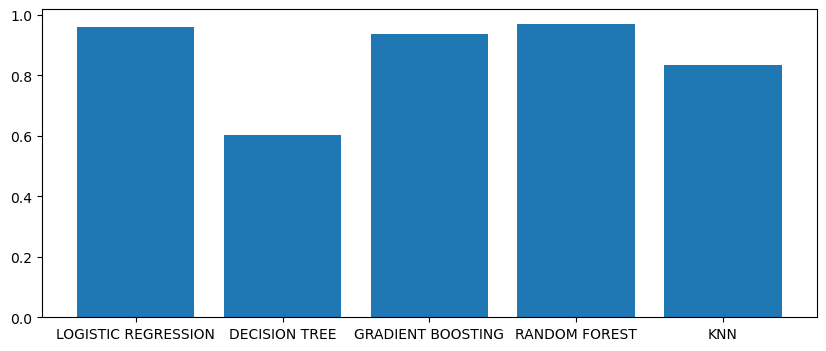

In [105]:
x, y = compare_models['model'],compare_models['accuracy']
ind = np.arange(len(y))
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(ind, y)
ax.set_xticks(ind)
ax.set_xticklabels(x)
ax.bar_label(ax.containers[0], horizontalalignment='left')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=12)
plt.show()
fig.savefig('Comparision of Models, TFIDF.pdf', format='pdf', bbox_inches = "tight")

(5,)